In [1]:
import pandas as pd
# Load the dataset
file_path = "/content/alld.csv"
df = pd.read_csv(file_path)

# Display basic information and the first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Column 1          322 non-null    int64 
 1   Column 2          322 non-null    int64 
 2   Column 3          322 non-null    int64 
 3   Column 4          322 non-null    int64 
 4   Column 5          322 non-null    int64 
 5   Column 6          322 non-null    int64 
 6   Column 7          322 non-null    int64 
 7   Column 8          322 non-null    int64 
 8   Column 9          322 non-null    int64 
 9   Column 10         322 non-null    int64 
 10  Column 11         322 non-null    int64 
 11  Column 12         322 non-null    int64 
 12  Column 13         322 non-null    int64 
 13  Column 14         322 non-null    int64 
 14  Column 15         322 non-null    int64 
 15  Column 16         322 non-null    int64 
 16  Column 17         322 non-null    int64 
 17  Column 18       

(None,
    Column 1  Column 2  Column 3  Column 4  Column 5  Column 6  Column 7  \
 0         0         0         1         2         2         3         0   
 1         0         3         0         1         0         0         0   
 2         0         2         3         3         2         3         1   
 3         0         2         0         2         1         0         0   
 4         0         3         0         2         1         2         0   
 
    Column 8  Column 9  Column 10  ...  ColumnP3  ColumnP4  ColumnP5  ColumnP6  \
 0         3         3          3  ...         0         0         0         1   
 1         3         1          0  ...         0         0         0         1   
 2         2         2          3  ...         3         2         2         3   
 3         2         3          0  ...         0         0         0         0   
 4         2         0          2  ...         2         2         0         2   
 
    ColumnP7  ColumnP8  ColumnP9  PHQ9Sco

In [2]:
df = df.dropna()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [4]:
# Drop the irrelevant column and separate features/target
df = df.drop(columns=["results"])

In [5]:
df = df.drop(columns=["PHQ9Score"])

In [6]:
X = df.drop(columns=["results encoding"])

y = df["results encoding"]

In [7]:
# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [8]:

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:

# Train MLP model
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

In [10]:
# Predictions and accuracy evaluation
y_pred = mlp.predict(X_test_scaled)

In [11]:
y_pred


array([0, 0, 0, 4, 2, 0, 1, 1, 0, 1, 1, 2, 3, 2, 1, 2, 0, 2, 4, 2, 2, 0,
       1, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 2, 3, 2, 2, 2, 1,
       2, 1, 2, 2, 1, 3, 1, 1, 2, 2, 0, 3, 1, 2, 2, 1, 2, 1, 2, 1, 1])

In [12]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8

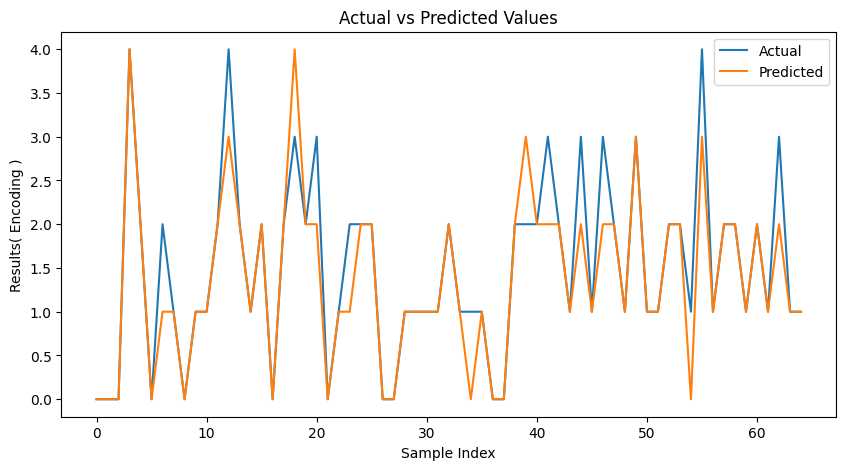

In [13]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Results( Encoding )")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()